In [ ]:
import os
import numpy as np
import cv2
import dlib
import sys

folder = "D:\SEMESTER 6\MachineLearning\wiki_crop\wiki_crop\Top10"
temp = "D:\SEMESTER 6\MachineLearning\wiki_crop\wiki_crop\Top10_1"
for filename in os.listdir(folder):
    img = cv2.imread(os.path.join(folder,filename))
    img = np.array(img)
    
    face_detector = dlib.get_frontal_face_detector()
    detected_face = face_detector(img)

    try:
        left = detected_face[0].left()

    except IndexError:
        a=5
    else:
        top = detected_face[0].top()
        right = detected_face[0].right()
        bottom = detected_face[0].bottom()
        cropped_img = img[top:bottom, left:right, :].copy()
        cv2.imwrite(folder+'/'+filename,cropped_img)
    
        if (img.size != 3):
            start = '_'
            end = '-'
            birth = (filename.split(start))[1].split(end)[0]

            today = filename[-8:-4]

            age = int(today) - int(birth)

            if age > 0 :
                age = str(age)

                directory = temp+'/'+age
                if not os.path.exists(directory):
                    os.makedirs(directory)

                os.rename(folder+'/'+filename, temp+'/'+age+'/'+filename[0:-5]+'('+age+')'+filename[-4:])


In [2]:
import numpy as np
import os
import cv2
dataSet = []
age = []

count = 0

folder = "D:\SEMESTER 6\MachineLearning\wiki_crop\wiki_crop\Top10_1"
for foldername in os.listdir(folder):
#     foldername = '\0'
    count = int(foldername)
#     print(count)
    foldername = 'D:\SEMESTER 6\MachineLearning\wiki_crop\wiki_crop\Top10_1\\' + foldername 
    for filename in os.listdir(foldername):
        img = cv2.imread(os.path.join(foldername,filename))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        img = cv2.resize(img, (50,50))
#         img = cv2.equalizeHist(img)
        img = np.ravel(img)
        if img is not None:
#             numbers = count
            age.append(count)
#             print(numbers)
            dataSet.append(img)


In [3]:
dataSet = np.array(dataSet)
dataSet.shape

(3424, 2500)

In [4]:
age = np.array(age)
age.size

3424

In [5]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(dataSet, age, test_size = 0.2, random_state=13)
X_train = X_train/255
X_test = X_test/255

# scalar = StandardScaler()
# scalar.fit(X_train)
# X_sc_train = scalar.transform(X_train)
# X_sc_test = scalar.transform(X_test)

C:\Users\Jeet J\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [41]:
from lpproj import LocalityPreservingProjection

lpp = LocalityPreservingProjection(n_components = 2500,n_neighbors=5)
feature_train = lpp.fit_transform(X_train)
feature_test = lpp.fit_transform(X_test)

In [109]:
Y_test1 = []
Y_train1 = []
for i in range(len(Y_test)):
    if (Y_test[i] > 0 and Y_test[i] <= 17):
        Y_test1.append(1)
    elif (Y_test[i] > 17 and Y_test[i] < 46):
        Y_test1.append(2)
    else:
        Y_test1.append(3)
Y_test1 = np.array(Y_test1)

for i in range(len(Y_train)):
    if (Y_train[i] > 0 and Y_train[i] <= 17):
        Y_train1.append(1)
    elif (Y_train[i] > 17 and Y_train[i] < 46):
        Y_train1.append(2)
    else:
        Y_train1.append(3)
        
Y_train1 = np.array(Y_train1)

In [110]:
Y_train1[0:100]

array([2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3,
       2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2,
       3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3])

In [111]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_train,Y_train1) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [112]:
pred = clf.predict(X_test)

In [113]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2739, 2500), (685, 2500), (2739,), (685,))

In [114]:
result = (pred - Y_test1)

In [115]:
error = (np.count_nonzero(result)/len(pred))*100

In [116]:
error

37.372262773722625

In [117]:
pred

array([2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 1, 3, 2, 2, 1, 2,
       2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 1, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 1,
       2, 2, 3, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3,
       3, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2,
       3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2,
       3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 3, 3, 1, 3, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 2, 2,
       2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 1, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 3,
       3, 3, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3,

In [140]:
img = cv2.imread('jeet.jpg')
img = cv2.resize(img,(50,50))
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = np.ravel(img)
img = img/255
img = img.reshape(1,-1)

In [141]:
pred = clf.predict(img)

In [142]:
pred

array([2])

Age Class :2 - Adult 
Age Range :18-46


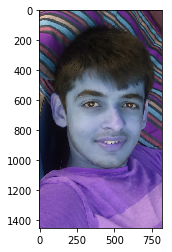

In [143]:
%matplotlib inline
img = cv2.imread('jeet.jpg')
plt.imshow(img)
print('Age Class :2 - Adult \nAge Range :18-46')